# MNE-Python Usefulness Assessment

## Goal:  
Decide if MNE-Python is a useful library to use for testing and general data exploration.

In [2]:
# MNE Imports
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci

In [3]:
# EEGbci dataset obtained from: https://physionet.org/pn4/eegmmidb/
# Note: Should definetly get that dataset in the MyBook for long term storage

'''
Information about the dataset:
This data set consists of over 1500 one- and two-minute EEG recordings, obtained from 109 volunteers, as described below.

Subjects performed different motor/imagery tasks while 64-channel EEG were recorded using the BCI2000 system (http://www.bci2000.org). 

Each subject performed 14 experimental runs: 
two one-minute baseline runs (one with eyes open, one with eyes closed),
and three two-minute runs of each of the four following tasks:
'''

# Variables Initialization
subject_id = 1 # 0 until 108
runs = 1 # 0 until 13
raw_fnames = eegbci.load_data(subject_id, runs)
raws = [read_raw_edf(file, preload=True) for file in raw_fnames]
raw = concatenate_raws(raws)


Extracting EDF parameters from C:\Users\biapt\mne_data\MNE-eegbci-data\physiobank\database\eegmmidb\S001\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


In [4]:
print(raw.info)

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Fc5., Fc3., Fc1., Fcz., Fc2., Fc4., Fc6., C5.., C3.., ...
    chs : list | 64 items (EEG: 64)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 80.0 Hz
    meas_date : tuple | 2009-08-12 16:15:00 GMT
    nchan : int | 64
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 160.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter

In [5]:
print(raw.ch_names)

['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']


In [6]:
# Renaming the channels to remove .
from mne import rename_channels
corr_ch_names = {}
for ch_name in raw.ch_names:
    corr_ch_names[ch_name] = ch_name.replace('.','')
rename_channels(raw.info, corr_ch_names)

<IPython.core.display.Javascript object>


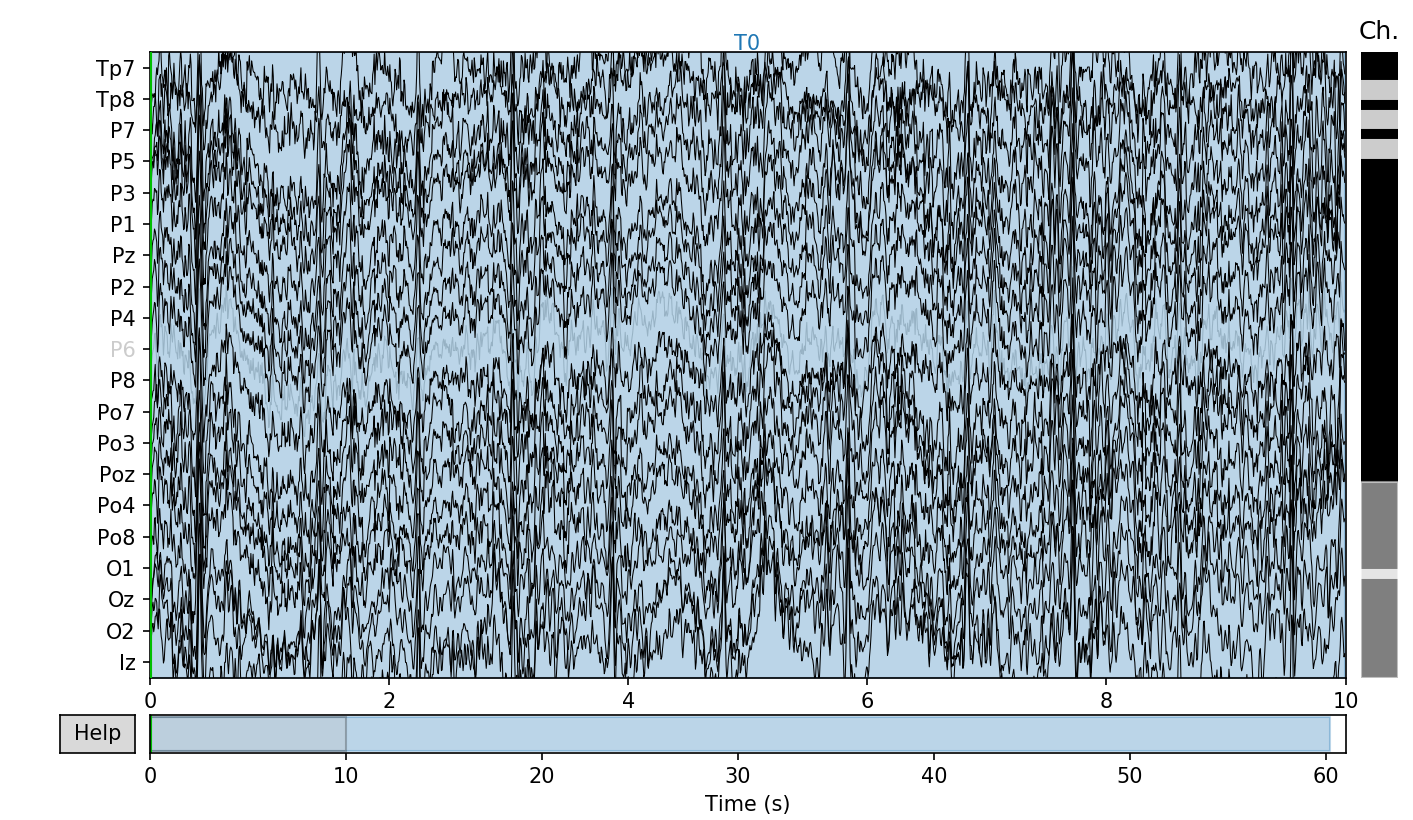

<IPython.core.display.Javascript object>


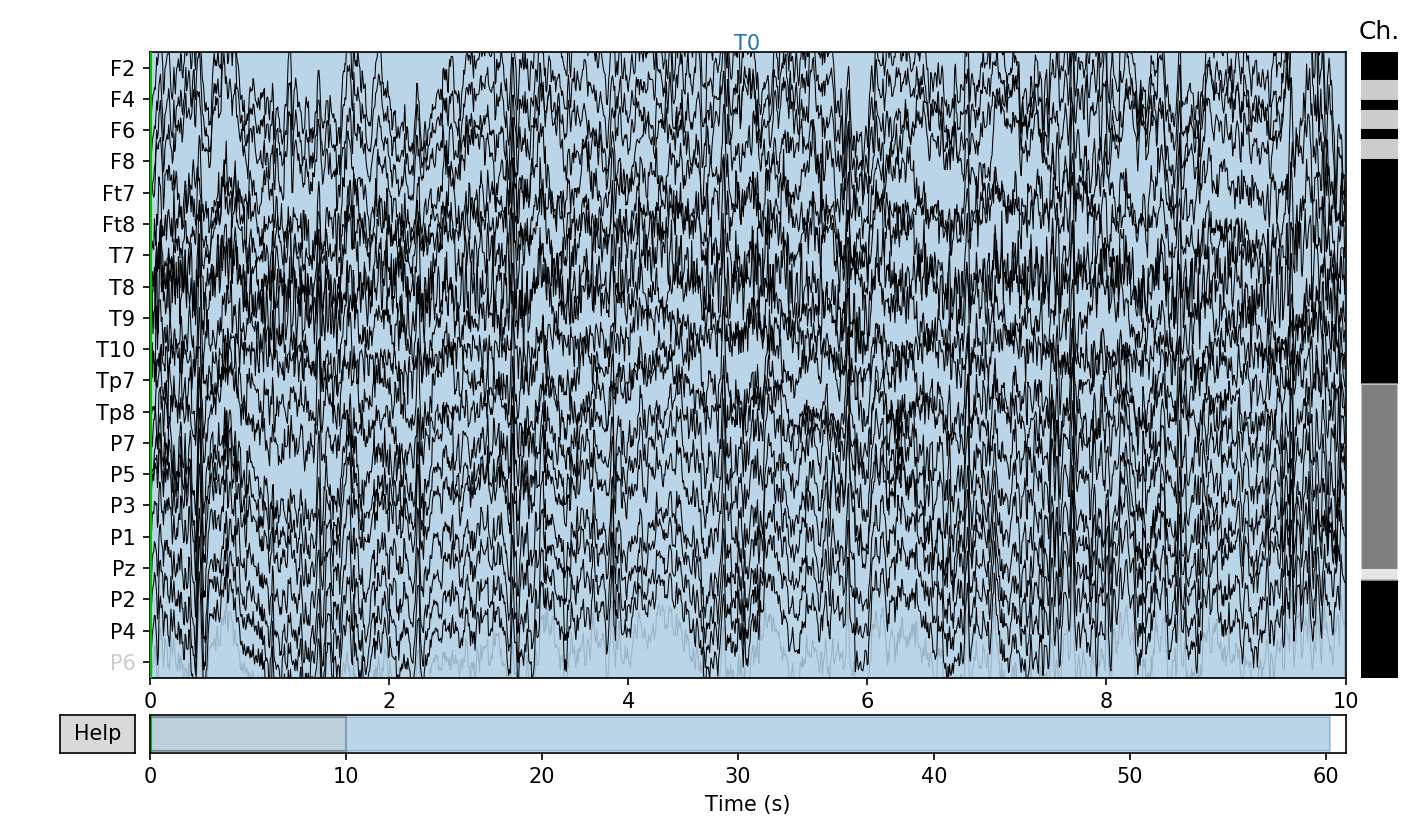

In [15]:
# plotting the raw data
%matplotlib notebook
import matplotlib
start, stop = raw.time_as_index([0, 61])  # 0 to 61sec
data, times = raw[:, start:stop]
raw.plot()

In [19]:
# Saving data
from mne import pick_types
picks = pick_types(raw.info, meg=False, eeg=True, stim=True,exclude='bads')
raw.save('test_raw.fif', tmin=0, tmax=60, picks=picks,overwrite=True)

Writing C:\Users\biapt\Documents\GitHub\Notebooks\experiments\test_raw.fif
Closing C:\Users\biapt\Documents\GitHub\Notebooks\experiments\test_raw.fif [done]


# Result
MNE-Python seems to be decent and well responsive. The documentation is well written and there are good tutorials on all the manipulation. Will use with one of my own dataset to see if I can go through a whole analysis with it.